In [162]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
import pickle
import scipy.optimize as opt
pd.options.display.max_seq_items = 2000

In [28]:
openfile=open( r"C:\Users\Joseph\Documents\Beamly\TakeHomeTask\beamly_case_study_noNaNs.pickle", "rb")
df=pickle.load(openfile)
openfile.close()

In [29]:
df.shape

(27091, 13)

In [30]:
df.head()

,date,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,total_products,num_orders,city,region,County,Country
1,2018-07-12,20.0,20,20,Mobile,between20and30,29.95,1.0,1,Redbourn,Hertfordshire,Hertfordshire,England
2,2018-08-05,22.0,22,22,Desktop and Laptop,between20and30,27.95,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
3,2018-07-13,14.0,14,14,Mobile,between20and30,27.95,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
5,2018-08-10,19.0,19,19,Tablet,lessThan10,9.95,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
6,2018-07-12,17.0,17,17,Desktop and Laptop,between20and30,29.95,1.0,1,Greenwich,Greenwich,missing_county,missing_country


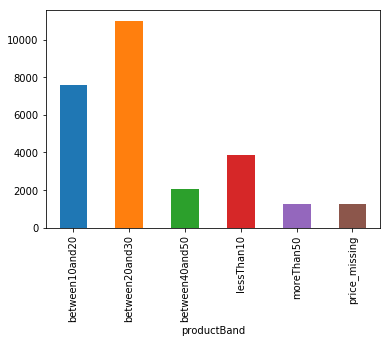

In [31]:
df.groupby(['productBand']).count()['date'].plot.bar()

Note: I realise that price_missing could be replaced, but I don't think it is necessary. It means that extra information is stored in the dataframe this way. Also the productBand column is redundant otherwise (as it can easily be reproduced with avg_price).

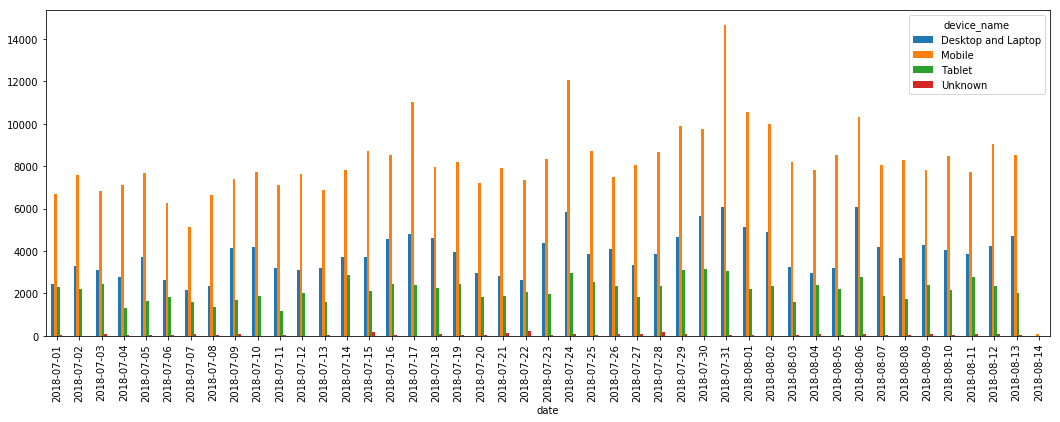

In [41]:
f, ax = plt.subplots(1,figsize=(18,6))
device_date=df.groupby(by=['device_name', 'date']).sum()
df.groupby(by=['device_name', 'date']).sum()['avg_price'].unstack(0).plot(kind='bar', ax=ax)

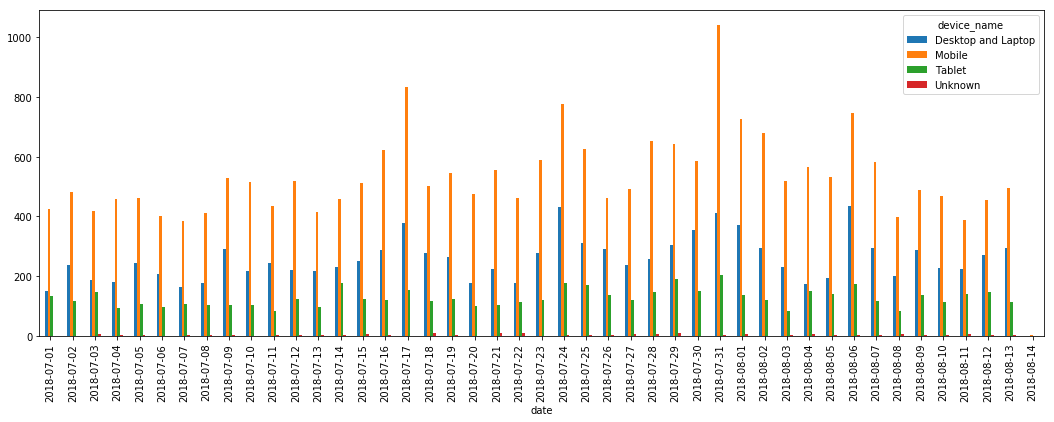

In [43]:
f, ax = plt.subplots(1,figsize=(18,6))

df.groupby(by=['device_name', 'date']).sum()['total_products'].unstack(0).plot(kind='bar', ax=ax)

Note: the two graphs above have very different trends for the last two weeks, because of the way the data was imputed. The total_products trend is more accurate

We only want to do short term forecasting, the best way t do that is to presume that there is a weekly and monthly trend that needs to be taken into account and forecast based on this. First want to find any weekly trend.

In [34]:

df_e=df
df_e['weekday']=df['date'].apply(lambda x:pd.to_datetime(x).weekday())
device_weekday=df_e.groupby(by=['device_name', 'weekday']).sum()['total_products'].unstack(0)

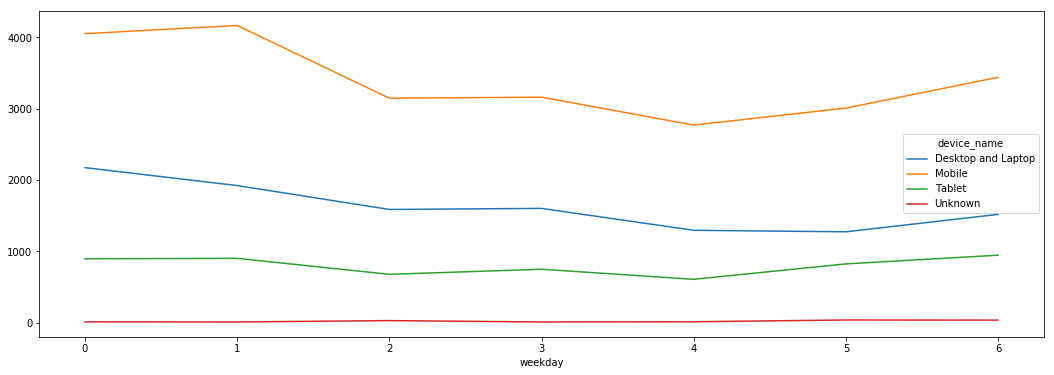

In [35]:
f, ax = plt.subplots(1,figsize=(18,6))
device_weekday.plot(ax=ax)

Remove this signal from the monthly data. Then find the monthly trend and combine them.

In [36]:
device_weekday['Desktop and Laptop']

weekday
0    2175.0
1    1924.0
2    1589.0
3    1604.0
4    1297.0
5    1276.0
6    1520.0
Name: Desktop and Laptop, dtype: float64

Oh I didn't realise I had already imputed the missing weeks inadvertantly hahaha. Well I guess I will move on to some forecasting

In [37]:

df_e['week_of_year']=df['date'].apply(lambda x:pd.to_datetime(x).isocalendar()[1])
df_e.sort_values(['date','avg_hour'],ascending=[True,True])

,date,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,total_products,num_orders,city,region,County,Country,weekday,week_of_year
4212,2018-07-01,0.0,0,0,Tablet,between20and30,29.950,1.0,1,Leeds,Leeds,missing_county,missing_country,6,26
4644,2018-07-01,0.0,0,0,Desktop and Laptop,between20and30,24.950,1.0,1,Oldham,Oldham,missing_county,missing_country,6,26
4946,2018-07-01,0.0,0,0,Tablet,between20and30,23.950,1.0,1,Neath,Neath Port Talbot,missing_county,missing_country,6,26
7077,2018-07-01,0.0,0,0,Desktop and Laptop,between20and30,22.950,1.0,1,Tower Hamlets,Tower Hamlets,missing_county,missing_country,6,26
11286,2018-07-01,0.0,0,0,Desktop and Laptop,between20and30,23.950,1.0,1,Oxford,Oxfordshire,Oxfordshire,England,6,26
11334,2018-07-01,0.0,0,0,Desktop and Laptop,lessThan10,3.490,1.0,1,Rotherham,Rotherham,missing_county,missing_country,6,26
11367,2018-07-01,0.0,0,0,Desktop and Laptop,between10and20,19.950,1.0,1,Rotherham,Rotherham,missing_county,missing_country,6,26
13272,2018-07-01,0.0,0,0,Desktop and Laptop,between10and20,15.900,1.0,1,Skelmersdale,Lancashire,Lancashire,England,6,26
13891,2018-07-01,0.0,0,0,Mobile,lessThan10,1.500,1.0,1,Wolverton,Milton Keynes,missing_county,missing_country,6,26
13906,2018-07-01,0.0,0,0,Desktop and Laptop,between10and20,17.500,1.0,1,Orpington,Bromley,missing_county,missing_country,6,26


In [38]:
df_e['week_of_year'].unique()

array([28, 31, 32, 27, 29, 33, 30, 26], dtype=int64)

In [68]:
device_date=df.groupby(by=['device_name','date','weekday','week_of_year']).agg({'total_products': np.sum})
device_date.reset_index(inplace=True)#level=['weekday','week_of_year']);


In [72]:
def scale_total_products(row,dwd):
    scaler=device_weekday[row['device_name']].apply(lambda x:x/device_weekday[row['device_name']].mean())
    return row['total_products']/scaler

device_date['tp_scaled']=device_date.apply(lambda row:scale_total_products(row,device_weekday),axis=1)

In [80]:
device_date.head(10)

,device_name,date,weekday,week_of_year,total_products,tp_scaled
0,Desktop and Laptop,2018-07-01,6,26,149.0,111.419704
1,Desktop and Laptop,2018-07-02,0,27,236.0,176.476847
2,Desktop and Laptop,2018-07-03,1,27,187.0,139.835468
3,Desktop and Laptop,2018-07-04,2,27,182.0,136.096552
4,Desktop and Laptop,2018-07-05,3,27,244.0,182.459113
5,Desktop and Laptop,2018-07-06,4,27,206.0,154.043350
6,Desktop and Laptop,2018-07-07,5,27,164.0,122.636453
7,Desktop and Laptop,2018-07-08,6,27,176.0,131.609852
8,Desktop and Laptop,2018-07-09,0,28,291.0,217.604926
9,Desktop and Laptop,2018-07-10,1,28,219.0,163.764532


c:\users\joseph\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


date
2018-07-01    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-02    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-03    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-04    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-05    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-06    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-07    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-08    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-09    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-10    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-11    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-12    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-13    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-14    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-15    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-16    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-17    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-18    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-19    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-20    AxesSubplot(

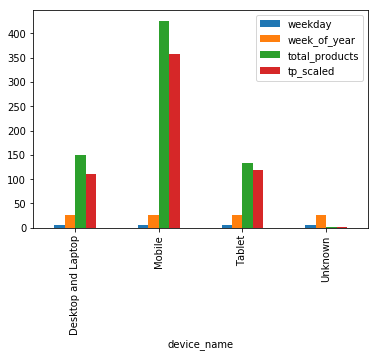

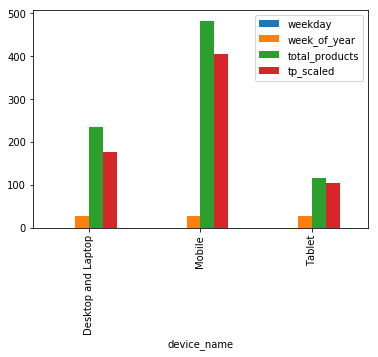

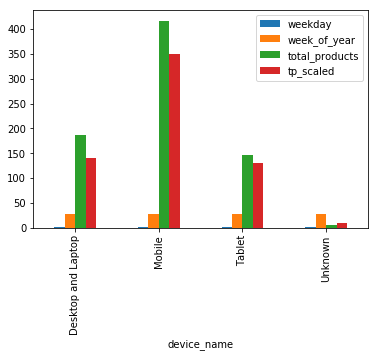

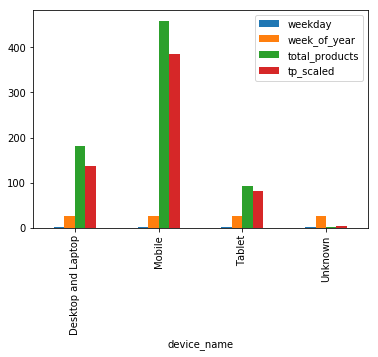

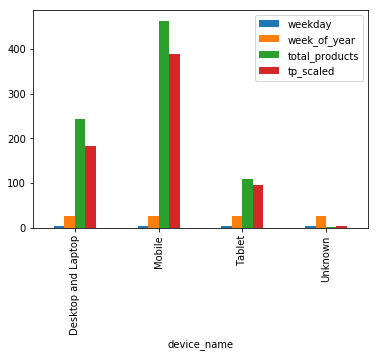

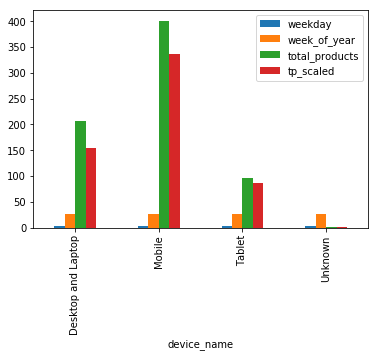

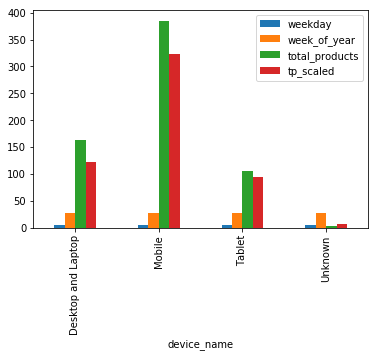

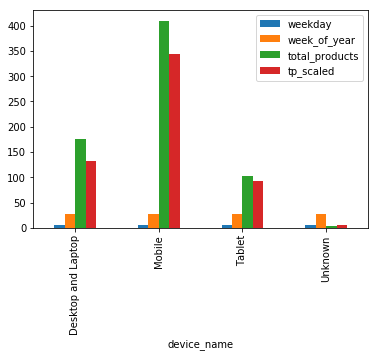

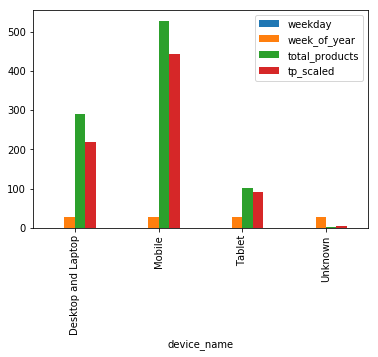

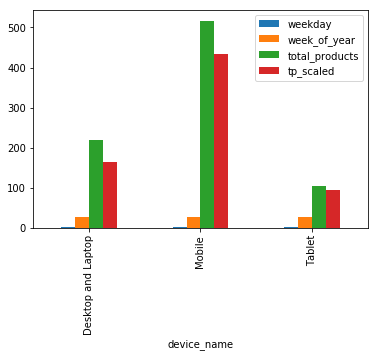

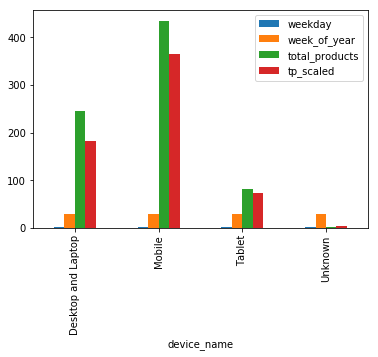

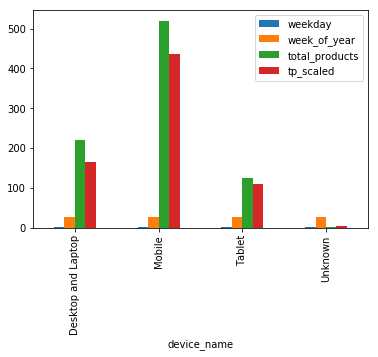

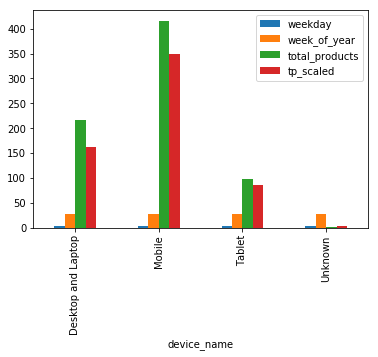

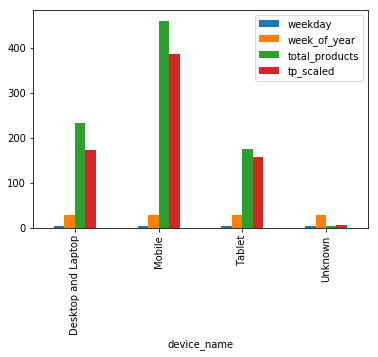

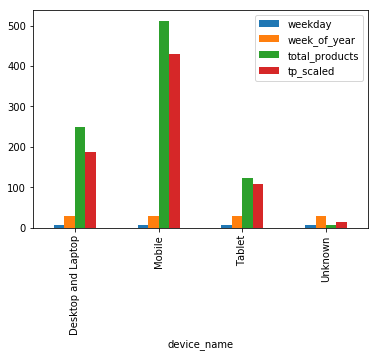

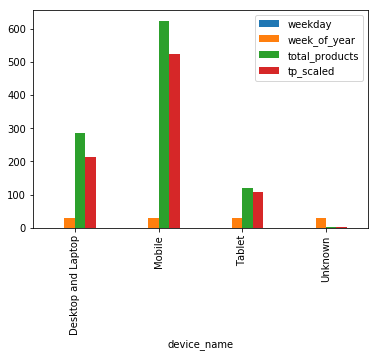

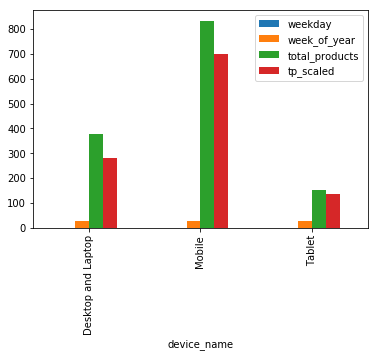

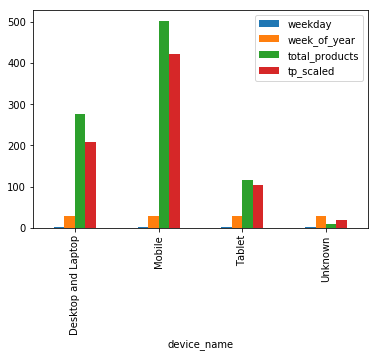

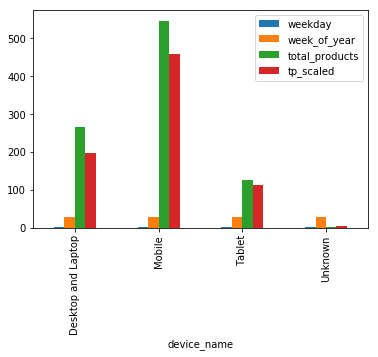

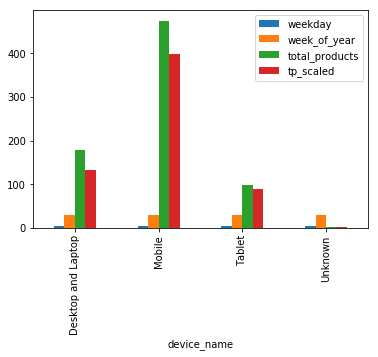

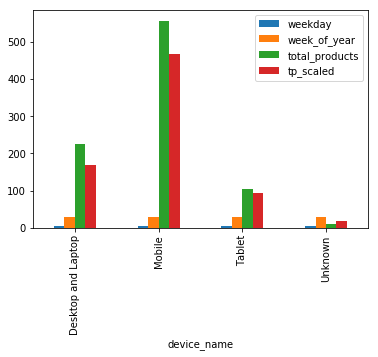

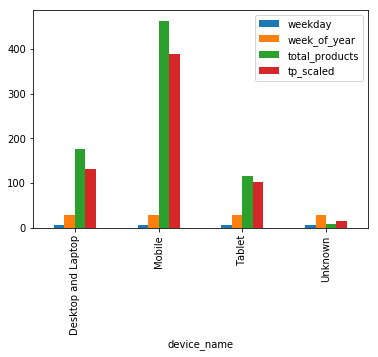

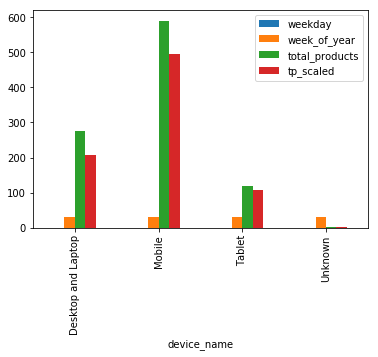

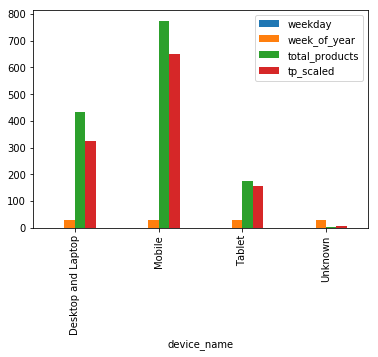

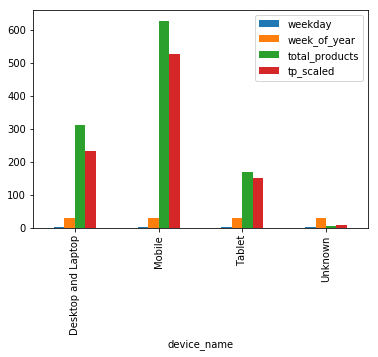

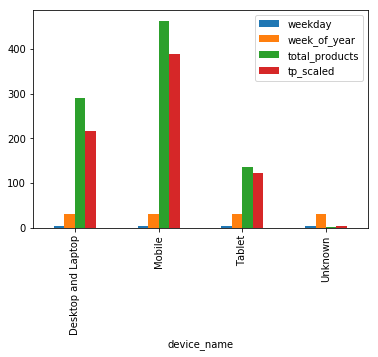

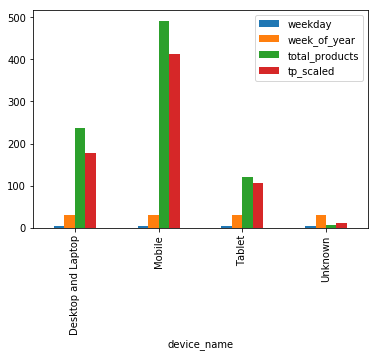

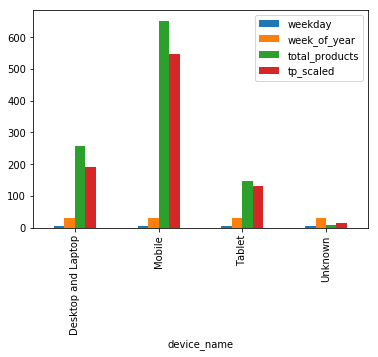

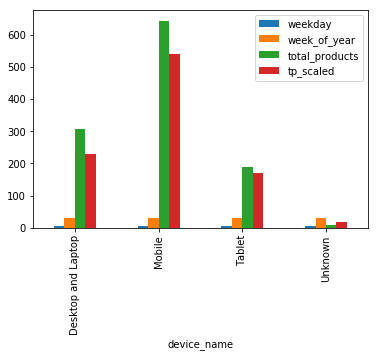

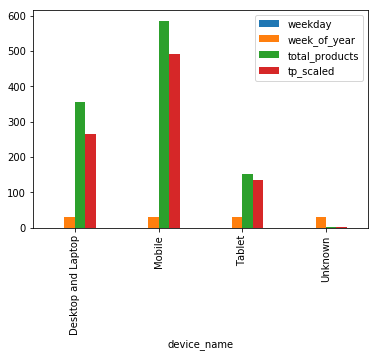

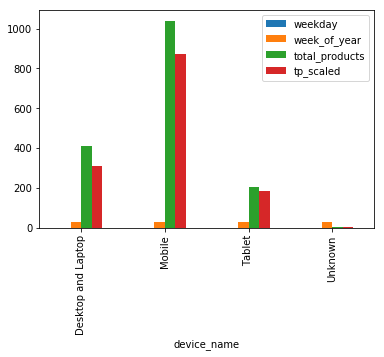

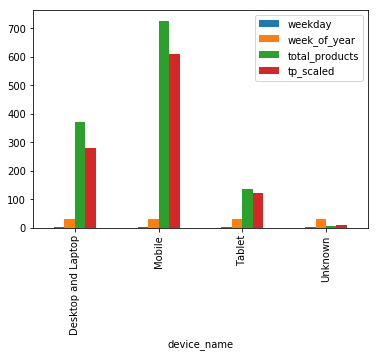

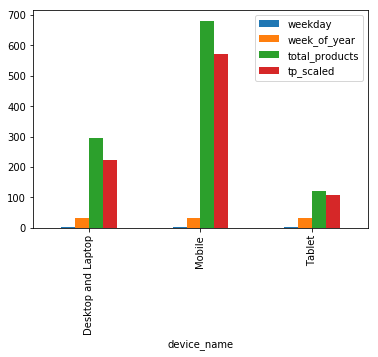

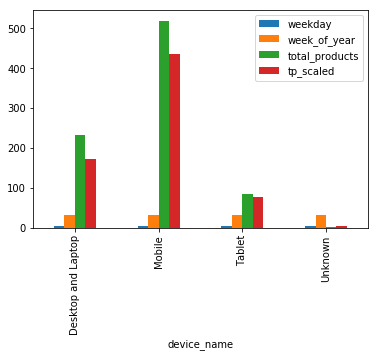

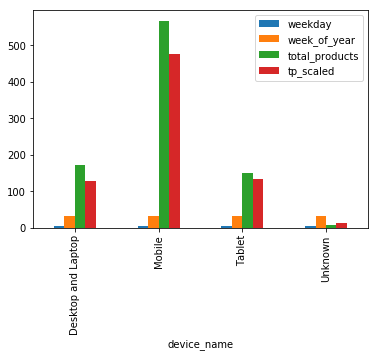

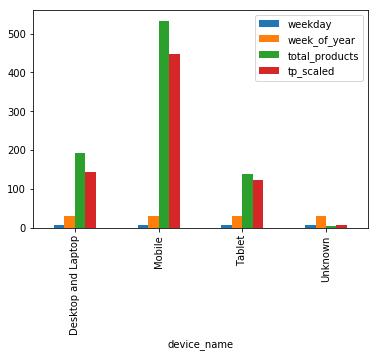

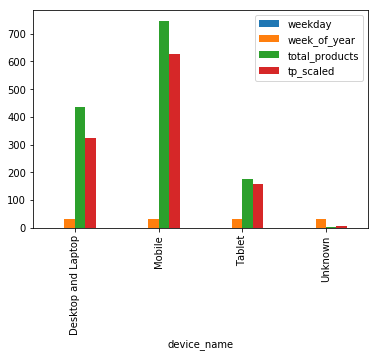

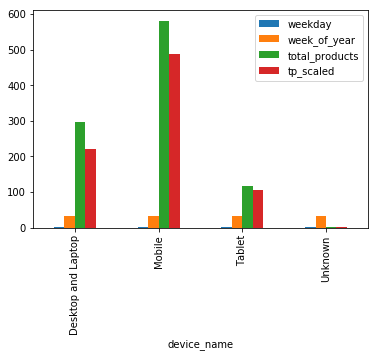

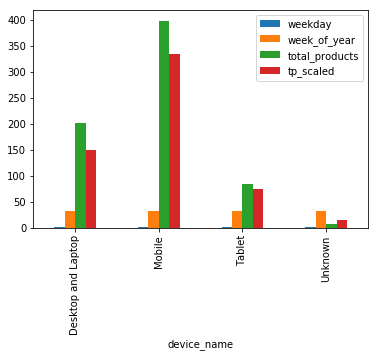

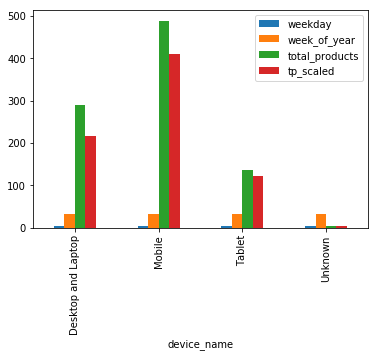

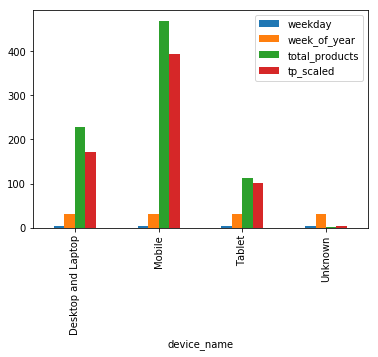

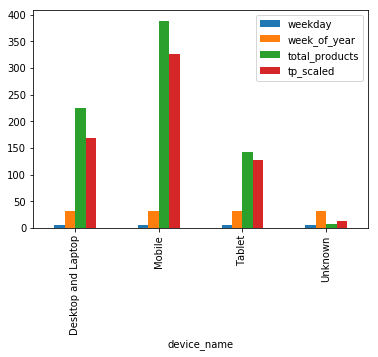

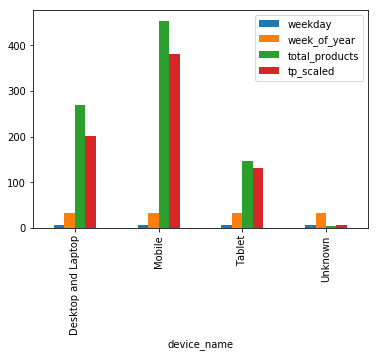

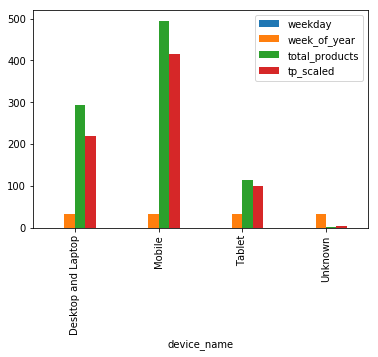

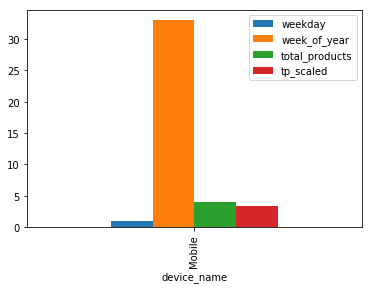

In [116]:
device_date.groupby('date').plot(kind='bar')

In [104]:

device_date.groupby(['device_name'])

In [114]:
device_date.set_index('device_name',inplace=True)


KeyError: 'device_name'

In [128]:
modelling_df=df.groupby(by=['device_name', 'date']).sum()['total_products'].unstack(0)

In [129]:
modelling_df.head(10)

device_name,Desktop and Laptop,Mobile,Tablet,Unknown
date,,,,
2018-07-01,149.0,426.0,134.0,1.0
2018-07-02,236.0,483.0,116.0,NaN
2018-07-03,187.0,417.0,147.0,5.0
2018-07-04,182.0,459.0,92.0,2.0
2018-07-05,244.0,463.0,108.0,2.0
2018-07-06,206.0,401.0,96.0,1.0
2018-07-07,164.0,385.0,106.0,4.0
2018-07-08,176.0,410.0,103.0,3.0
2018-07-09,291.0,528.0,102.0,2.0


In [130]:
modelling_df.columns

Index(['Desktop and Laptop', 'Mobile', 'Tablet', 'Unknown'], dtype='object', name='device_name')

In [139]:
def scale_total_products_modelling(row,dwd,col):
    scaler=dwd[col].apply(lambda x:x/dwd[col].mean())
    weekday_temp=pd.to_datetime(row.name).weekday()
    #print(scaler,weekday_temp,scaler[weekday_temp])
    return row[col]/scaler[weekday_temp]
modelling_df_new=modelling_df
for column in modelling_df.columns:
    modelling_df_new[column]=modelling_df.apply(lambda row:scale_total_products_modelling(row,device_weekday,column),axis=1)

In [140]:
modelling_df_new.head(10)

device_name,Desktop and Laptop,Mobile,Tablet,Unknown
date,,,,
2018-07-01,66.666073,246.658577,80.926915,3.351951
2018-07-02,73.792961,237.433406,73.956811,NaN
2018-07-03,66.099585,199.333200,93.099089,53.072561
2018-07-04,77.895019,290.409835,77.459634,8.217687
2018-07-05,103.454088,291.644032,82.334214,21.229024
2018-07-06,108.016336,288.218890,90.102725,8.491610
2018-07-07,87.408843,254.838787,73.472081,12.737415
2018-07-08,78.746503,237.394405,62.205017,10.055854
2018-07-09,90.990473,259.554531,65.030989,19.596023


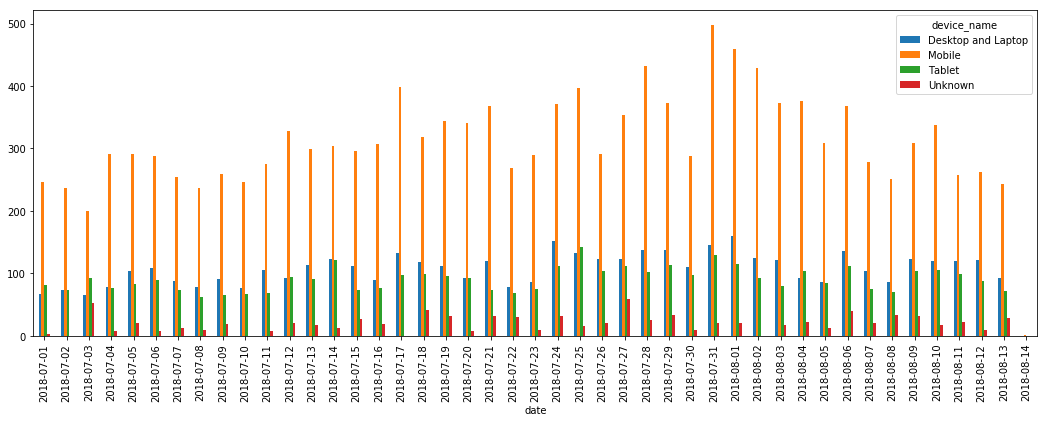

In [141]:
f, ax = plt.subplots(1,figsize=(18,6))
modelling_df_new.plot(kind='bar', ax=ax)

Now we can model the sales for the month, with weekly trends removed. Then combine the two later. Given more time, these could be fit simulatneously, but it's better to start with the basics.

In [142]:
modelling_df_new.index

Index(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
       '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09', '2018-07-10',
       '2018-07-11', '2018-07-12', '2018-07-13', '2018-07-14', '2018-07-15',
       '2018-07-16', '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
       '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24', '2018-07-25',
       '2018-07-26', '2018-07-27', '2018-07-28', '2018-07-29', '2018-07-30',
       '2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04',
       '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09',
       '2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13', '2018-08-14'],
      dtype='object', name='date')

In [143]:
modelling_df_new.shape

(45, 4)

In [144]:
modelling_month=modelling_df_new[pd.to_datetime(modelling_df_new.index).month<8]
modelling_month.shape

(31, 4)

In [145]:
modelling_month

device_name,Desktop and Laptop,Mobile,Tablet,Unknown
date,,,,
2018-07-01,66.666073,246.658577,80.926915,3.351951
2018-07-02,73.792961,237.433406,73.956811,NaN
2018-07-03,66.099585,199.333200,93.099089,53.072561
2018-07-04,77.895019,290.409835,77.459634,8.217687
2018-07-05,103.454088,291.644032,82.334214,21.229024
2018-07-06,108.016336,288.218890,90.102725,8.491610
2018-07-07,87.408843,254.838787,73.472081,12.737415
2018-07-08,78.746503,237.394405,62.205017,10.055854
2018-07-09,90.990473,259.554531,65.030989,19.596023


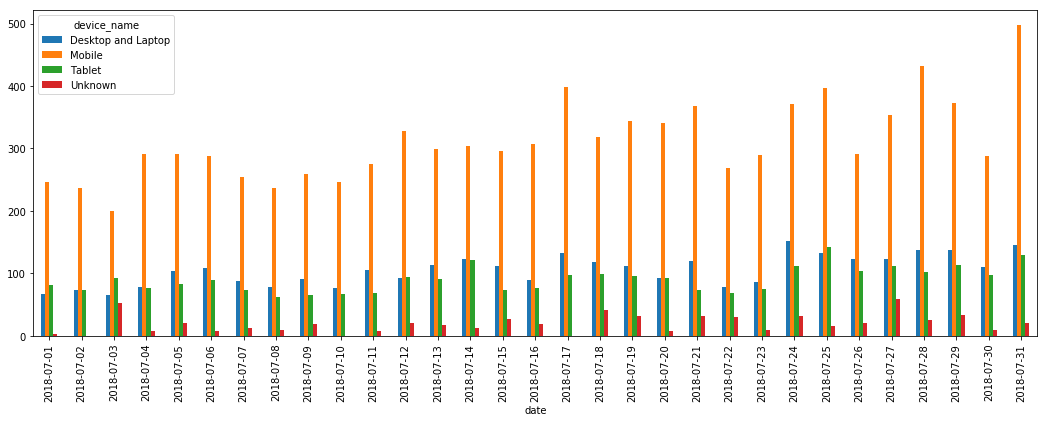

In [147]:
f, ax = plt.subplots(1,figsize=(18,6))
modelling_month.plot(kind='bar', ax=ax)

Can use this as a very simplistic model

In [149]:
modelling_month.reset_index(inplace=True)

In [153]:
modelling_month['day_of_month']=modelling_month['date'].apply(lambda x:pd.to_datetime(x).day)
modelling_month.drop(['Unknown'],axis=1,inplace=True)

c:\users\joseph\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\joseph\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


It's a bit pointless having Unknown in, so dropping it

In [154]:
modelling_month

device_name,date,Desktop and Laptop,Mobile,Tablet,day_of_month
0,2018-07-01,66.666073,246.658577,80.926915,1
1,2018-07-02,73.792961,237.433406,73.956811,2
2,2018-07-03,66.099585,199.333200,93.099089,3
3,2018-07-04,77.895019,290.409835,77.459634,4
4,2018-07-05,103.454088,291.644032,82.334214,5
5,2018-07-06,108.016336,288.218890,90.102725,6
6,2018-07-07,87.408843,254.838787,73.472081,7
7,2018-07-08,78.746503,237.394405,62.205017,8
8,2018-07-09,90.990473,259.554531,65.030989,9
9,2018-07-10,77.410744,247.134927,66.499349,10


In [157]:
real_august=modelling_df_new[pd.to_datetime(modelling_df_new.index).month==8]
real_august=real_august[pd.to_datetime(real_august.index).day<13]
real_august#not sure if last two days have all the data, so use up to the 12th

device_name,Desktop and Laptop,Mobile,Tablet,Unknown
date,,,,
2018-08-01,159.641989,459.973747,114.505546,20.544217
2018-08-02,125.501681,428.962389,92.244814,NaN
2018-08-03,121.649465,373.031432,79.778454,16.983220
2018-08-04,92.205669,375.308032,103.969927,22.290476
2018-08-05,86.352699,308.612727,83.946576,13.407805
2018-08-06,136.016687,367.210671,111.572776,39.192045
2018-08-07,104.628221,277.728032,74.732602,21.229024
2018-08-08,86.026916,251.815064,70.724014,32.870748
2018-08-09,122.533736,308.021451,104.442475,31.843537


In [181]:
def movingaverage(interval, window_size):
    """ 
    A function to calculate a moving average, useful for looking at data trends and for dampening noise in a less artificial way.
    """
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [159]:
matching_august=modelling_month[modelling_month['day_of_month']<13]
matching_august

device_name,date,Desktop and Laptop,Mobile,Tablet,day_of_month
0,2018-07-01,66.666073,246.658577,80.926915,1
1,2018-07-02,73.792961,237.433406,73.956811,2
2,2018-07-03,66.099585,199.333200,93.099089,3
3,2018-07-04,77.895019,290.409835,77.459634,4
4,2018-07-05,103.454088,291.644032,82.334214,5
5,2018-07-06,108.016336,288.218890,90.102725,6
6,2018-07-07,87.408843,254.838787,73.472081,7
7,2018-07-08,78.746503,237.394405,62.205017,8
8,2018-07-09,90.990473,259.554531,65.030989,9
9,2018-07-10,77.410744,247.134927,66.499349,10


Fit the two weeks to each other as a basic forecast. essentially I am using the previous month trend and presuming that the purchases will act in the exact same way (as opposed to some continued decrease).

In [167]:
#Try with Mobile first
y=matching_august['Mobile'].values
x1=real_august['Mobile'].values
o0=[1.]
errfunc = lambda o, x1, y: x1*o - y # Distance to the target function, through linear combination.
o1, success = opt.leastsq(errfunc, o0[:], args=(x1, y))
print(o1,success)

[0.75192871] 2
[246.65857697 237.43340578 199.33320048 290.40983498 291.64403232
 288.21889036 254.8387869  237.39440506 259.55453055 247.13492722
 275.22500701 327.54837324] [459.97374735 428.9623888  373.03143167 375.30803161 308.61272658
 367.21067106 277.72803233 251.81506388 308.02145099 337.09391416
 257.4864626  262.8708778 ]


In [178]:
y=matching_august['Desktop and Laptop'].values
x1=real_august['Desktop and Laptop'].values
o0=[1.]
errfunc = lambda o, x1, y: x1*o - y # Distance to the target function, through linear combination.
o1, success = opt.leastsq(errfunc, o0[:], args=(x1, y))
print(o1,success)

[0.71127525] 2


In [173]:
forecast_august=modelling_month
import datetime
def add_one_month(orig_date):
    # advance year and month by one month
    year = orig_date.year
    month = orig_date.month + 1
    day = orig_date.day
    return datetime.date(year, month, day)
forecast_august['date']=forecast_august['date'].apply(lambda x:add_one_month(pd.to_datetime(x)))
forecast_august

c:\users\joseph\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


device_name,date,Desktop and Laptop,Mobile,Tablet,day_of_month
0,2018-08-01,66.666073,246.658577,80.926915,1
1,2018-08-02,73.792961,237.433406,73.956811,2
2,2018-08-03,66.099585,199.333200,93.099089,3
3,2018-08-04,77.895019,290.409835,77.459634,4
4,2018-08-05,103.454088,291.644032,82.334214,5
5,2018-08-06,108.016336,288.218890,90.102725,6
6,2018-08-07,87.408843,254.838787,73.472081,7
7,2018-08-08,78.746503,237.394405,62.205017,8
8,2018-08-09,90.990473,259.554531,65.030989,9
9,2018-08-10,77.410744,247.134927,66.499349,10


In [175]:
forecast_august.set_index('date',inplace=True)

In [176]:
forecast_august.drop(['day_of_month','Tablet'],axis=1,inplace=True)

c:\users\joseph\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [179]:
mobile_scaler=0.75192871
DandL_scaler=0.71127525
forecast_august['Desktop and Laptop']=forecast_august['Desktop and Laptop'].apply(lambda x:x*DandL_scaler)
forecast_august['Mobile']=forecast_august['Mobile'].apply(lambda x:x*mobile_scaler)
forecast_august

c:\users\joseph\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\joseph\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


device_name,Desktop and Laptop,Mobile
date,,
2018-08-01,47.417928,185.469666
2018-08-02,52.487107,178.532995
2018-08-03,47.014999,149.884356
2018-08-04,55.404799,218.367493
2018-08-05,73.584333,219.295521
2018-08-06,76.829346,216.720058
2018-08-07,62.171746,191.620600
2018-08-08,56.010438,178.503669
2018-08-09,64.719272,195.166503


In [194]:
move_av_mobile=movingaverage(forecast_august['Mobile'].values,4)
move_av_DandL=movingaverage(forecast_august['Desktop and Laptop'].values,4)
print(len(move_av_mobile))

31


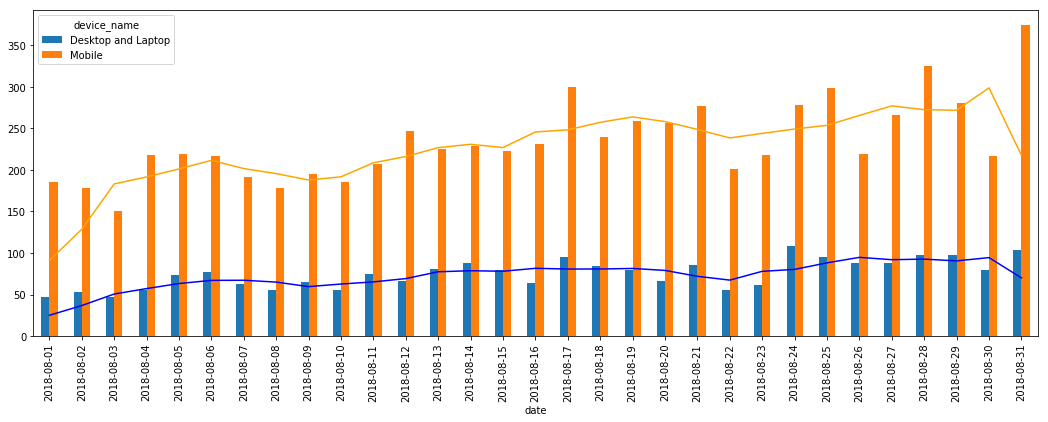

In [195]:
f, ax = plt.subplots(1,figsize=(18,6))
forecast_august.plot(kind='bar', ax=ax)
ax.plot(move_av_mobile,color='orange')
ax.plot(move_av_DandL,color='blue')

This is a very simple way of forecasting sale. The reason why you should really do it this way though is that you cannot model monthly trends with only one months worth of data. So the only forecasting you can do is a monthly forecast, which presumes that the same behaviour is seen month to month. We can try in a bit to forecast without this assumption, but the results are less reliable. For now, I will use the function created in Estimating_Sales_for_Missing_Band to find the sales for the new product line. This will all be based on work in this notebook and the notebook Estimating_Sales_for_Missing_Band.